# Week - 

# 6. Build a simple linear Regression Machine Learning model to analysis relationship between CIE and SEE

In [2]:
import pandas as pd 
import numpy as np 
df=pd.read_csv("C:/Users/MANASA N S/OneDrive/ドキュメント/MINE PERSONAL/DATASETS CSV FORMATS/Marks/CIE_SEE.csv") 
df.head()

,USN,IN1,EX1,TOT 1,IN2,EX2,TOT 2,IN3,EX3,TOT 3,...,IN5,EX5,TOT 5,IN6,EX6,TOT 6,IN7,EX7,TOT 7,Score
0,1JS141S001,1.0,27,28.0,9,29.0,38.0,11.0,26.0,37.0,...,16.0,34.0,50.0,19,28,47.0,16,43,59,305.0
1,1JS141S002,17.0,45,62.0,18,42.0,60.0,8.0,33.0,41.0,...,8.0,43.0,51.0,19,39,58.0,8,41,49,365.0
2,1JS141S003,20.0,34,54.0,4,39.0,43.0,19.0,37.0,56.0,...,8.0,43.0,51.0,12,47,59.0,4,49,53,NaN
3,1JS141S004,12.0,26,NaN,18,26.0,44.0,11.0,34.0,45.0,...,13.0,43.0,56.0,5,29,34.0,8,43,51,294.0
4,1JS141S005,8.0,50,58.0,1,24.0,25.0,12.0,41.0,53.0,...,2.0,39.0,41.0,20,29,49.0,20,44,64,330.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   USN     67 non-null     object 
 1   IN1     66 non-null     float64
 2   EX1     67 non-null     int64  
 3   TOT 1   65 non-null     float64
 4   IN2     67 non-null     int64  
 5   EX2     66 non-null     float64
 6   TOT 2   66 non-null     float64
 7   IN3     66 non-null     float64
 8   EX3     65 non-null     float64
 9   TOT 3   66 non-null     float64
 10  IN4     65 non-null     float64
 11  EX4     66 non-null     float64
 12  TOT 4   66 non-null     float64
 13  IN5     66 non-null     float64
 14  EX5     66 non-null     float64
 15  TOT 5   66 non-null     float64
 16  IN6     67 non-null     int64  
 17  EX6     67 non-null     int64  
 18  TOT 6   66 non-null     float64
 19  IN7     67 non-null     int64  
 20  EX7     67 non-null     int64  
 21  TOT 7   67 non-null     int64  
 22  Scor

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(lambda x : le.fit_transform(x))

In [8]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [10]:
x.shape

(67, 22)

In [12]:
y.shape

(67,)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(x)
scaled.shape

(67, 22)

In [16]:
from sklearn.model_selection import train_test_split 
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size = 0.2,random_state=42)  

In [18]:
from sklearn.linear_model import LinearRegression 
lm=LinearRegression() 
lm.fit(x_train,y_train) 

LinearRegression()

In [20]:
y_pred=lm.predict(x_test)

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("MAE --->", mean_absolute_error(y_test, y_pred))
print("MSE --->", mean_squared_error(y_test, y_pred))
print("R2 Score --->", r2_score(y_test, y_pred))
print("RMSE --->", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE ---> 11.02754131374363
MSE ---> 192.96027129072436
R2 Score ---> 0.09807995676479231
RMSE ---> 13.891014048323628


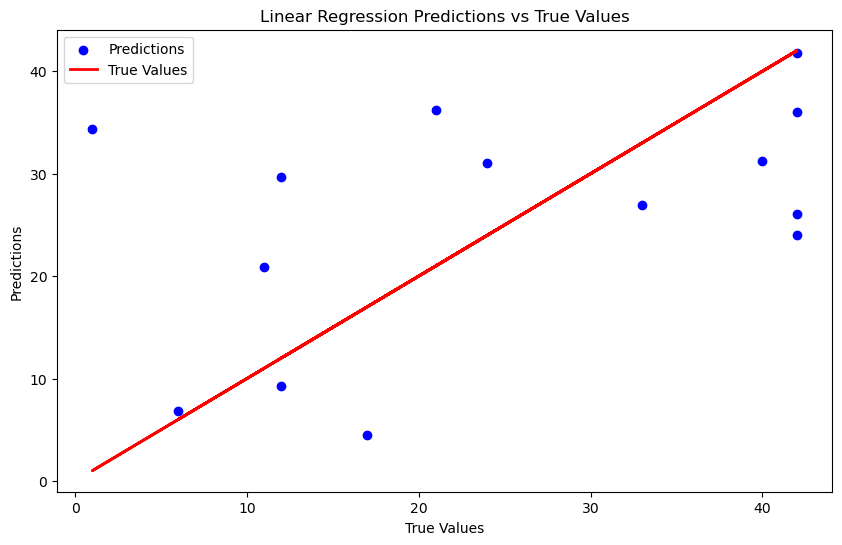

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot(y_test, y_test, color='red', linewidth=2, label='True Values')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression Predictions vs True Values')
plt.legend()
plt.show()